# Dogs vs. Cats
- Create an algorithm to distinguish dogs from cats
- in kaggle project : https://www.kaggle.com/c/dogs-vs-cats/data


In [ ]:
# 모듈
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import zipfile

# 데이터 준비
path = "C:\\Users\\wshkk\\Downloads\\dogs_vs_cats\\train\\train"
fileNames = os.listdir(path)    # 폴더 내 파일의 이름을 리스트로
fileNames   # 'cat.0.jpg' 파일 이름 형식

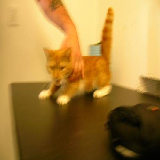

In [8]:
# 이미지 관찰
# keras - preprocessing, target_size 설정
# numpy로 embedding
image = tf.keras.preprocessing.image.load_img(path+'/'+'cat.0.jpg', target_size=(160,160))
imageArr = np.array(image)  # embedding
image

In [18]:
labels = [] # 종속변수
images = [] # 독립변수

# 파일 이름에서 카테고리 분리하기, One-hot encodling (dog : 0 // cat = 1)
for fileName in fileNames:
    # label 처리
    label = fileName.split('.')[0] # . 을 기준으로 나눠 제일 앞의 요소
    if label == 'dog':
        label = 0
    else:
        label = 1
    labels.append(label)
    # 이미지 처리   
    image = tf.keras.preprocessing.image.load_img(path+'/'+fileName, target_size=(32,32))
    imageArr = np.array(image)
    images.append(imageArr)

0


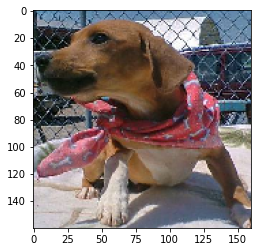

In [24]:
# labels, images 매칭 확인
i = 20000
print(labels[i])
plt.imshow(images[i])


In [32]:
labels = np.array(labels)   # 1차원 배열로 만들기
images = np.array(images)   # 4차원 배열로 만들기
print(labels.shape, images.shape)

(25000,) (25000, 160, 160, 3)


In [33]:
# train, test 분리  (20000 : 5000)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(20000, 160, 160, 3) (20000,)
(5000, 160, 160, 3) (5000,)


In [34]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [1]:
def residual_block(n_filter, x):
    h = tf.keras.layers.Conv2D(n_filter // 4, 1, padding="same")(x)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Activation("swish")(h)

    h = tf.keras.layers.Conv2D(n_filter // 4, 3, padding="same")(h)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Activation("swish")(h)

    h = tf.keras.layers.Conv2D(n_filter, 1, padding="same")(h)
    h = tf.keras.layers.BatchNormalization()(h)

    # x.shape (8, 8, 64)
    if x.shape[-1] != n_filter:
        x = tf.keras.layers.Conv2D(n_filter, 1, padding="same")(x)

    h = tf.keras.layers.Add()([x, h])
    h = tf.keras.layers.Activation("swish")(h)
    return h

In [ ]:
X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Conv2D(64, 5, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(H)
H = tf.keras.layers.Dropout(0.6)(H)

for i in range(3):
    H = residual_block(256, H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(256, 3, strides=2, padding="same")(H)

for i in range(8):
    H = residual_block(512, H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(512, 3, strides=2, padding="same")(H)
H = tf.keras.layers.Dropout(0.6)(H)

for i in range(36):
    H = residual_block(1024, H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(1024, 3, strides=2, padding="same")(H)
H = tf.keras.layers.Dropout(0.6)(H)

for i in range(3):
    H = residual_block(2048, H)
# H = tf.keras.layers.AvgPool2D()(H)
H = tf.keras.layers.Conv2D(2048, 3, strides=2, padding="same")(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.summary()

In [ ]:
# 모델 학습
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train, y_train, epochs=1000000, batch_size=128, validation_split=0.1, callbacks=[es])

# Epoch 33/1000000
# 141/141 [==============================] - 78s 550ms/step - loss: 0.2280 - accuracy: 0.9046 - val_loss: 0.5248 - val_accuracy: 0.8075
# Epoch 34/1000000
# 141/141 [==============================] - 77s 550ms/step - loss: 0.2140 - accuracy: 0.9115 - val_loss: 0.5689 - val_accuracy: 0.7960
# Epoch 35/1000000
# 141/141 [==============================] - 78s 551ms/step - loss: 0.1901 - accuracy: 0.9221 - val_loss: 0.6326 - val_accuracy: 0.7930